# Water Quality Lesson 1: Locate Lakes and Reservoirs with In-Situ Measurements

**Description**: In this notebook, we will select Colorado lakes and reservoirs that are detectable by EMIT and ECOSTRESS. We will sub-select the five largest lakes and reservoirs to ensure we have lots of water quality pixels to visualize. 

**Objectives**:
1) Lea
2) 
3) Lean how to extract ROI of interest

**Bonus Activity**: If you have time, you can also subselect lakes and reservoirs with in-situ water quality measurements, such as water temperature and chlorophyll. This will help us compare the consistency between remote sensing measurements and measurements taken on the ground in future HYR-SENSE water quality notebooks.

**Instructor: Kelly Luis, JPL (kelly.m.luis@jpl.nasa.gov)**

In [12]:
# Load Modules
import geopandas as gpd # Open Shapefiles in Python 
import dataretrieval.nwis as nwis # Connect to USGS Water Quality Portal
import matplotlib.pyplot as plt # Plotting Function
import numpy as np

## Data Preparation

In [20]:
# Load Geopandas File with Lakes and Reservoirs
lr_gdf = gpd.read_file('data/co_lr/co_lr.shp')
print(len(lr_gdf))

# Visualize First 5 Entries
lr_gdf.head()

7272


,OBJECTID,NAME,FTYPE,FCODE,FCODE_DESC,SQKM,SQMI,geometry
0,31720,None,Stream/River,46006,Stream/River: Hydrographic Category = Perennial,8.53,3.29,"POLYGON ((-107.75863 40.39502, -107.75893 40.3..."
1,31721,None,Lake/Pond,39001,Lake/Pond: Hydrographic Category = Intermittent,0.03,0.01,"POLYGON ((-107.92224 40.44486, -107.92251 40.4..."
2,31722,None,Lake/Pond,39001,Lake/Pond: Hydrographic Category = Intermittent,0.02,0.01,"POLYGON ((-107.85354 40.33381, -107.85357 40.3..."
3,31723,None,Lake/Pond,39004,Lake/Pond: Hydrographic Category = Perennial,0.14,0.06,"POLYGON ((-108.35394 40.59423, -108.35406 40.5..."
4,31724,None,Lake/Pond,39001,Lake/Pond: Hydrographic Category = Intermittent,0.01,0.01,"POLYGON ((-108.27277 40.54833, -108.27307 40.5..."


In [57]:
# Subselect for Lake/Pond and Reservoir, Order by Size, Drop NA rows
sub_gdf = lr_gdf[lr_gdf['FTYPE'].isin({'Lake/Pond', 'Reservoir'})].sort_values('SQKM', ascending=False).dropna()

,OBJECTID,NAME,FTYPE,FCODE,FCODE_DESC,SQKM,SQMI,geometry
653,33687,Navajo Reservoir,Lake/Pond,39009,Lake/Pond: Hydrographic Category = Perennial; ...,62.23,24.03,"MULTIPOLYGON (((-107.40077 37.00001, -107.4028..."
6600,43123,"Meredith, Lake",Lake/Pond,39009,Lake/Pond: Hydrographic Category = Perennial; ...,22.39,8.65,"POLYGON ((-103.73971 38.15313, -103.73994 38.1..."
2954,37396,Dillon Reservoir,Lake/Pond,39010,Lake/Pond: Hydrographic Category = Perennial; ...,12.94,4.99,"POLYGON ((-106.04899 39.56965, -106.04904 39.5..."
7076,43606,Neenoshe Reservoir,Lake/Pond,39009,Lake/Pond: Hydrographic Category = Perennial; ...,12.82,4.95,"POLYGON ((-102.67934 38.35004, -102.67838 38.3..."
1674,34797,Elevenmile Canyon Reservoir,Lake/Pond,39010,Lake/Pond: Hydrographic Category = Perennial; ...,12.63,4.88,"POLYGON ((-105.47853 38.89399, -105.47899 38.8..."


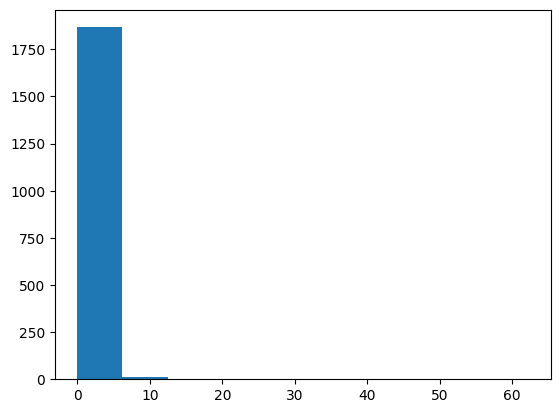

In [56]:
# Look at spatial area of lakes and reservoirs
plt.hist(sub_gdf.SQKM)
sub_gdf.head(n=5)

<Axes: >

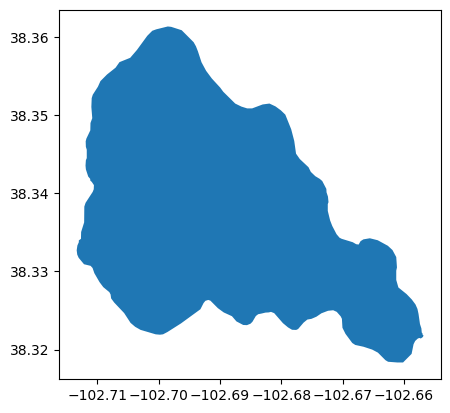

In [61]:
# Visualize Based on Lake Name
lake_name = 'Neenoshe Reservoir'
sub_gdf[sub_gdf['NAME'] == lake_name].plot()

In [63]:
# Save Neenoshe Reservoir
sub_gdf[sub_gdf['NAME'] == lake_name].to_file('~/PycharmProjects/HYR-SENSE/notebooks/water_quality/data/neenoshe_file.shp', driver='ESRI Shapefile')